In [24]:
import numpy as np
import cv2
import matplotlib
import imutils
from matplotlib import pyplot as plt
%matplotlib inline



In [25]:
hog=cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
img = cv2.imread(r'C:\Users\Vishwas\Desktop\Techno Ramdev\model\test_image\1 (12).jpg')
img.shape

(565, 870, 3)

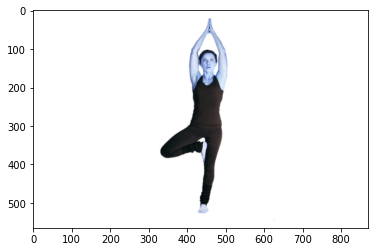

In [26]:
plt.imshow(img)
img=imutils.resize(img,width=min(500,img.shape[1]))

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(324, 500)

In [28]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

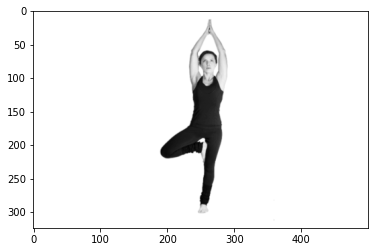

In [29]:
plt.imshow(gray, cmap='gray')

In [30]:
(regions,_)=hog.detectMultiScale(img,winStride=(8,8),padding=(16,16),scale=1.05,)

regions 

array([[187,  36, 147, 288]], dtype=int32)

In [31]:
for (x,y,w,h) in regions:
    cv2.rectangle(gray,(x,y),(x+w,y+h),(0,0,255),2)
    roi_color = gray[y:y+h, x:x+w]

In [32]:
for (x,y,w,h) in regions:
    cv2.rectangle(gray,(x,y),(x+w,y+h),(0,0,255),2)
    roi_color = gray[y:y+h, x:x+w]

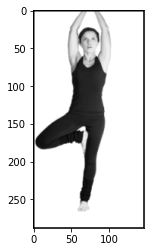

In [33]:

%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [34]:
cropped_img = np.array(roi_color)
cropped_img.shape

(288, 147)

In [35]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2BGR)
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

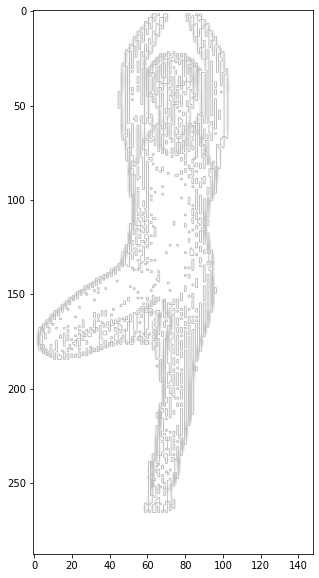

In [36]:
im_har = w2d(cropped_img,'db1',1)
plt.figure(figsize=(20,10))
plt.imshow(im_har, cmap='gray')

In [37]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    img=imutils.resize(img,width=min(300,img.shape[0]))
    (regions,_)=hog.detectMultiScale(img,winStride=(4,4),padding=(4,4),scale=1.05)
    for (x,y,w,h) in regions:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        roi_color = img[y:y+h, x:x+w]    
        return roi_color

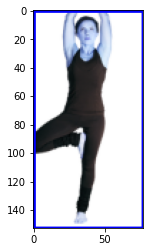

In [38]:

cropped_image = get_cropped_image(r'C:\Users\Vishwas\Desktop\Techno Ramdev\model\test_image\1 (12).jpg')
plt.imshow(cropped_image)

In [39]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/0_cropped/"

In [40]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [41]:
img_dirs

['./dataset/0_cropped', './dataset/tadasana', './dataset/vrikshasana']

In [42]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [43]:
cropped_image_dirs = []
yoga_names_dict = {}
for img_dir in img_dirs:
    count = 1
    yoga_name = img_dir.split('/')[-1]
    yoga_names_dict[yoga_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + yoga_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = yoga_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            yoga_names_dict[yoga_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/0_cropped/tadasana
Generating cropped images in folder:  ./dataset/0_cropped/vrikshasana


In [44]:
yoga_file_names_dict = {}
for img_dir in cropped_image_dirs:
    yoga_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    yoga_file_names_dict[yoga_name] = file_list
yoga_file_names_dict

{'tadasana': ['./dataset/0_cropped/tadasana\\tadasana1.png',
  './dataset/0_cropped/tadasana\\tadasana2.png',
  './dataset/0_cropped/tadasana\\tadasana3.png',
  './dataset/0_cropped/tadasana\\tadasana4.png',
  './dataset/0_cropped/tadasana\\tadasana5.png',
  './dataset/0_cropped/tadasana\\tadasana6.png',
  './dataset/0_cropped/tadasana\\tadasana7.png'],
 'vrikshasana': ['./dataset/0_cropped/vrikshasana\\vrikshasana1.png',
  './dataset/0_cropped/vrikshasana\\vrikshasana2.png',
  './dataset/0_cropped/vrikshasana\\vrikshasana3.png',
  './dataset/0_cropped/vrikshasana\\vrikshasana4.png',
  './dataset/0_cropped/vrikshasana\\vrikshasana5.png',
  './dataset/0_cropped/vrikshasana\\vrikshasana6.png']}

In [45]:
class_dict = {}
count = 0
for yoga_name in yoga_file_names_dict.keys():
    class_dict[yoga_name] = count
    count = count + 1
class_dict

{'tadasana': 0, 'vrikshasana': 1}

In [46]:
X, y = [], []
for yoga_name, training_files in yoga_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',1)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32*4,1)))
        X.append(combined_img)
        y.append(class_dict[yoga_name])  

In [47]:
len(X[0])

7168

In [48]:
X[0]

array([[109],
       [107],
       [239],
       ...,
       [ 34],
       [ 57],
       [ 57]], dtype=uint8)

In [49]:
y[0]

0

In [50]:
X = np.array(X).reshape(len(X),7168).astype(float)
X.shape

(13, 7168)

In [51]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5

In [53]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



c:\program files\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [57]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [58]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


,model,best_score,best_params
0,svm,0.4,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
1,random_forest,0.6,{'randomforestclassifier__n_estimators': 1}
2,logistic_regression,0.4,{'logisticregression__C': 1}


In [59]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=1))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [60]:
best_estimators['svm'].score(X_test,y_test)

0.5

In [61]:
best_estimators['random_forest'].score(X_test,y_test)

0.25

In [62]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.75

In [65]:
best_clf = best_estimators['logistic_regression']

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 1],
       [0, 2]], dtype=int64)

Text(69.0, 0.5, 'Truth')

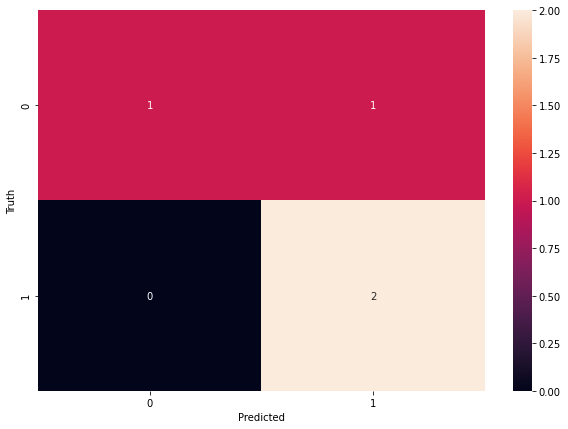

In [67]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
class_dict

{'tadasana': 0, 'vrikshasana': 1}

In [69]:

import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [70]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))